# Principal Component Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pca import pca
from sklearn import datasets
from sklearn.decomposition import PCA


## Loading data

In [28]:
df = pd.read_csv("/Users/megankelly/ASDA/happy.csv")

## Data Inspection and Cleaning

In [36]:
df.shape

(156, 9)

In [14]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [8]:
df.sample(7)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
112,113,Sierra Leone,4.571,0.256,0.813,0.000,0.355,0.238,0.053
24,25,Chile,6.476,1.131,1.331,0.808,0.431,0.197,0.061
126,127,Ethiopia,4.350,0.308,0.950,0.391,0.452,0.220,0.146
45,46,Thailand,6.072,1.016,1.417,0.707,0.637,0.364,0.029
123,124,Kenya,4.410,0.493,1.048,0.454,0.504,0.352,0.055
124,125,Zambia,4.377,0.562,1.047,0.295,0.503,0.221,0.082
10,11,United Kingdom,7.190,1.244,1.433,0.888,0.464,0.262,0.082


In [37]:
# Create table
data = df.copy()

def format_example_values(series):
    vals = series.dropna().unique()[:5]
    
    formatted = []
    for v in vals:
        if isinstance(v, (int, float, np.number)):
            formatted.append(f"{v:.2f}")
        else:
            formatted.append(str(v))
    return ", ".join(formatted)

summary_df = pd.DataFrame({
    "Feature/variable": data.columns,
    "Data type": data.dtypes.values.astype(str),
    "Description": [""] * len(data.columns),
    "Number of Unique values": [data[col].nunique() for col in data.columns],
    "Example values": [format_example_values(data[col]) for col in data.columns]
})

# Show all rows without truncation
with pd.option_context("display.max_rows", None, "display.max_colwidth", None):
    print(summary_df.to_markdown(index=False))

| Feature/variable             | Data type   | Description   |   Number of Unique values | Example values                                 |
|:-----------------------------|:------------|:--------------|--------------------------:|:-----------------------------------------------|
| Overall rank                 | int64       |               |                       156 | 1.00, 2.00, 3.00, 4.00, 5.00                   |
| Country or region            | object      |               |                       156 | Finland, Norway, Denmark, Iceland, Switzerland |
| Score                        | float64     |               |                       154 | 7.63, 7.59, 7.55, 7.50, 7.49                   |
| GDP per capita               | float64     |               |                       147 | 1.30, 1.46, 1.35, 1.34, 1.42                   |
| Social support               | float64     |               |                       146 | 1.59, 1.58, 1.59, 1.64, 1.55                   |
| Healthy life expec

In [39]:
# Create table for numeric columns
# numeric variables only (target + predictors)
# Drop Overall rank
data = data.drop(columns=["Overall rank"], errors='ignore')
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Basic descriptive statistics
desc = data[numeric_cols].describe().rename(index={
    "50%": "50%",
    "25%": "25%",
    "75%": "75%"
})

# Add variance
desc.loc["Variance"] = data[numeric_cols].var()

# Add dispersion index = variance / mean
dispersion_index = data[numeric_cols].var() / data[numeric_cols].mean()
desc.loc["Dispersion index (Variance / Mean)"] = dispersion_index

# Reorder rows to match your required format
row_order = [
    "count", "mean", "std", "min", "25%", "50%", "75%", "max",
    "Variance", "Dispersion index (Variance / Mean)"
]
desc = desc.loc[row_order]

# Convert to Markdown
md_table = desc.to_markdown(tablefmt="pipe", floatfmt=".2f")
print(md_table)

|                                    |   Score |   GDP per capita |   Social support |   Healthy life expectancy |   Freedom to make life choices |   Generosity |   Perceptions of corruption |
|:-----------------------------------|--------:|-----------------:|-----------------:|--------------------------:|-------------------------------:|-------------:|----------------------------:|
| count                              |  156.00 |           156.00 |           156.00 |                    156.00 |                         156.00 |       156.00 |                      156.00 |
| mean                               |    5.38 |             0.89 |             1.21 |                      0.60 |                           0.45 |         0.18 |                        0.11 |
| std                                |    1.12 |             0.39 |             0.30 |                      0.25 |                           0.16 |         0.10 |                        0.10 |
| min                              

In [42]:
# Split into numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Categorical columns: ['Country or region']


In [47]:
# Ensure only existing columns are selected
numeric_cols = [col for col in numeric_cols if col in data.columns]

# Basic descriptive statistics
desc = data[numeric_cols].describe().rename(index={
    "50%": "50%",
    "25%": "25%",
    "75%": "75%"
})

# Add variance
desc.loc["Variance"] = data[numeric_cols].var()

# Add dispersion index = variance / mean
dispersion_index = data[numeric_cols].var() / data[numeric_cols].mean()
desc.loc["Dispersion index (Variance / Mean)"] = dispersion_index

# Reorder rows
row_order = [
    "count", "mean", "std", "min", "25%", "50%", "75%", "max",
    "Variance", "Dispersion index (Variance / Mean)"
]
desc = desc.loc[row_order]

# Transpose the table
desc = desc.T

# Convert to Markdown
md_table = desc.to_markdown(tablefmt="pipe", floatfmt=".2f")
print(md_table)


|                              |   count |   mean |   std |   min |   25% |   50% |   75% |   max |   Variance |   Dispersion index (Variance / Mean) |
|:-----------------------------|--------:|-------:|------:|------:|------:|------:|------:|------:|-----------:|-------------------------------------:|
| Score                        |  156.00 |   5.38 |  1.12 |  2.90 |  4.45 |  5.38 |  6.17 |  7.63 |       1.25 |                                 0.23 |
| GDP per capita               |  156.00 |   0.89 |  0.39 |  0.00 |  0.62 |  0.95 |  1.20 |  2.10 |       0.15 |                                 0.17 |
| Social support               |  156.00 |   1.21 |  0.30 |  0.00 |  1.07 |  1.25 |  1.46 |  1.64 |       0.09 |                                 0.08 |
| Healthy life expectancy      |  156.00 |   0.60 |  0.25 |  0.00 |  0.42 |  0.64 |  0.78 |  1.03 |       0.06 |                                 0.10 |
| Freedom to make life choices |  156.00 |   0.45 |  0.16 |  0.00 |  0.36 |  0.49 |  0.5

In [49]:
# Descriptive table for categorical variables

cat_desc = pd.DataFrame(index=categorical_cols, columns=[
    "Unique Values"
])

for col in categorical_cols:
    counts = data[col].value_counts(dropna=False)
    most_freq_val = counts.idxmax()
    freq = counts.max()
    perc = freq / counts.sum() * 100

    cat_desc.loc[col] = [
        data[col].nunique()
    ]

# Convert to Markdown
md_table_cat = cat_desc.to_markdown(tablefmt="pipe", floatfmt=".2f")
print(md_table_cat)

|                   |   Unique Values |
|:------------------|----------------:|
| Country or region |             156 |


## Runnning PCA

[18-12-2025 15:39:43] [pca.pca] [INFO] The PCA reduction is performed on 6 variables (columns) of the input dataframe.
[18-12-2025 15:39:43] [pca.pca] [INFO] Fit using PCA.
[18-12-2025 15:39:43] [pca.pca] [INFO] Compute loadings and PCs.
[18-12-2025 15:39:43] [pca.pca] [INFO] Compute explained variance.
[18-12-2025 15:39:43] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[18-12-2025 15:39:43] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[18-12-2025 15:39:43] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[18-12-2025 15:39:43] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[18-12-2025 15:39:43] [scatterd.scatterd] [INFO] Create scatterplot
[18-12-2025 15:39:43] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[18-12-2025 15:39:43] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[18-12-2025 15:39:43] [scatterd.scatterd] [INFO] Create 

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance.\n The top 2 Principal Component(s) explains [72.15%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

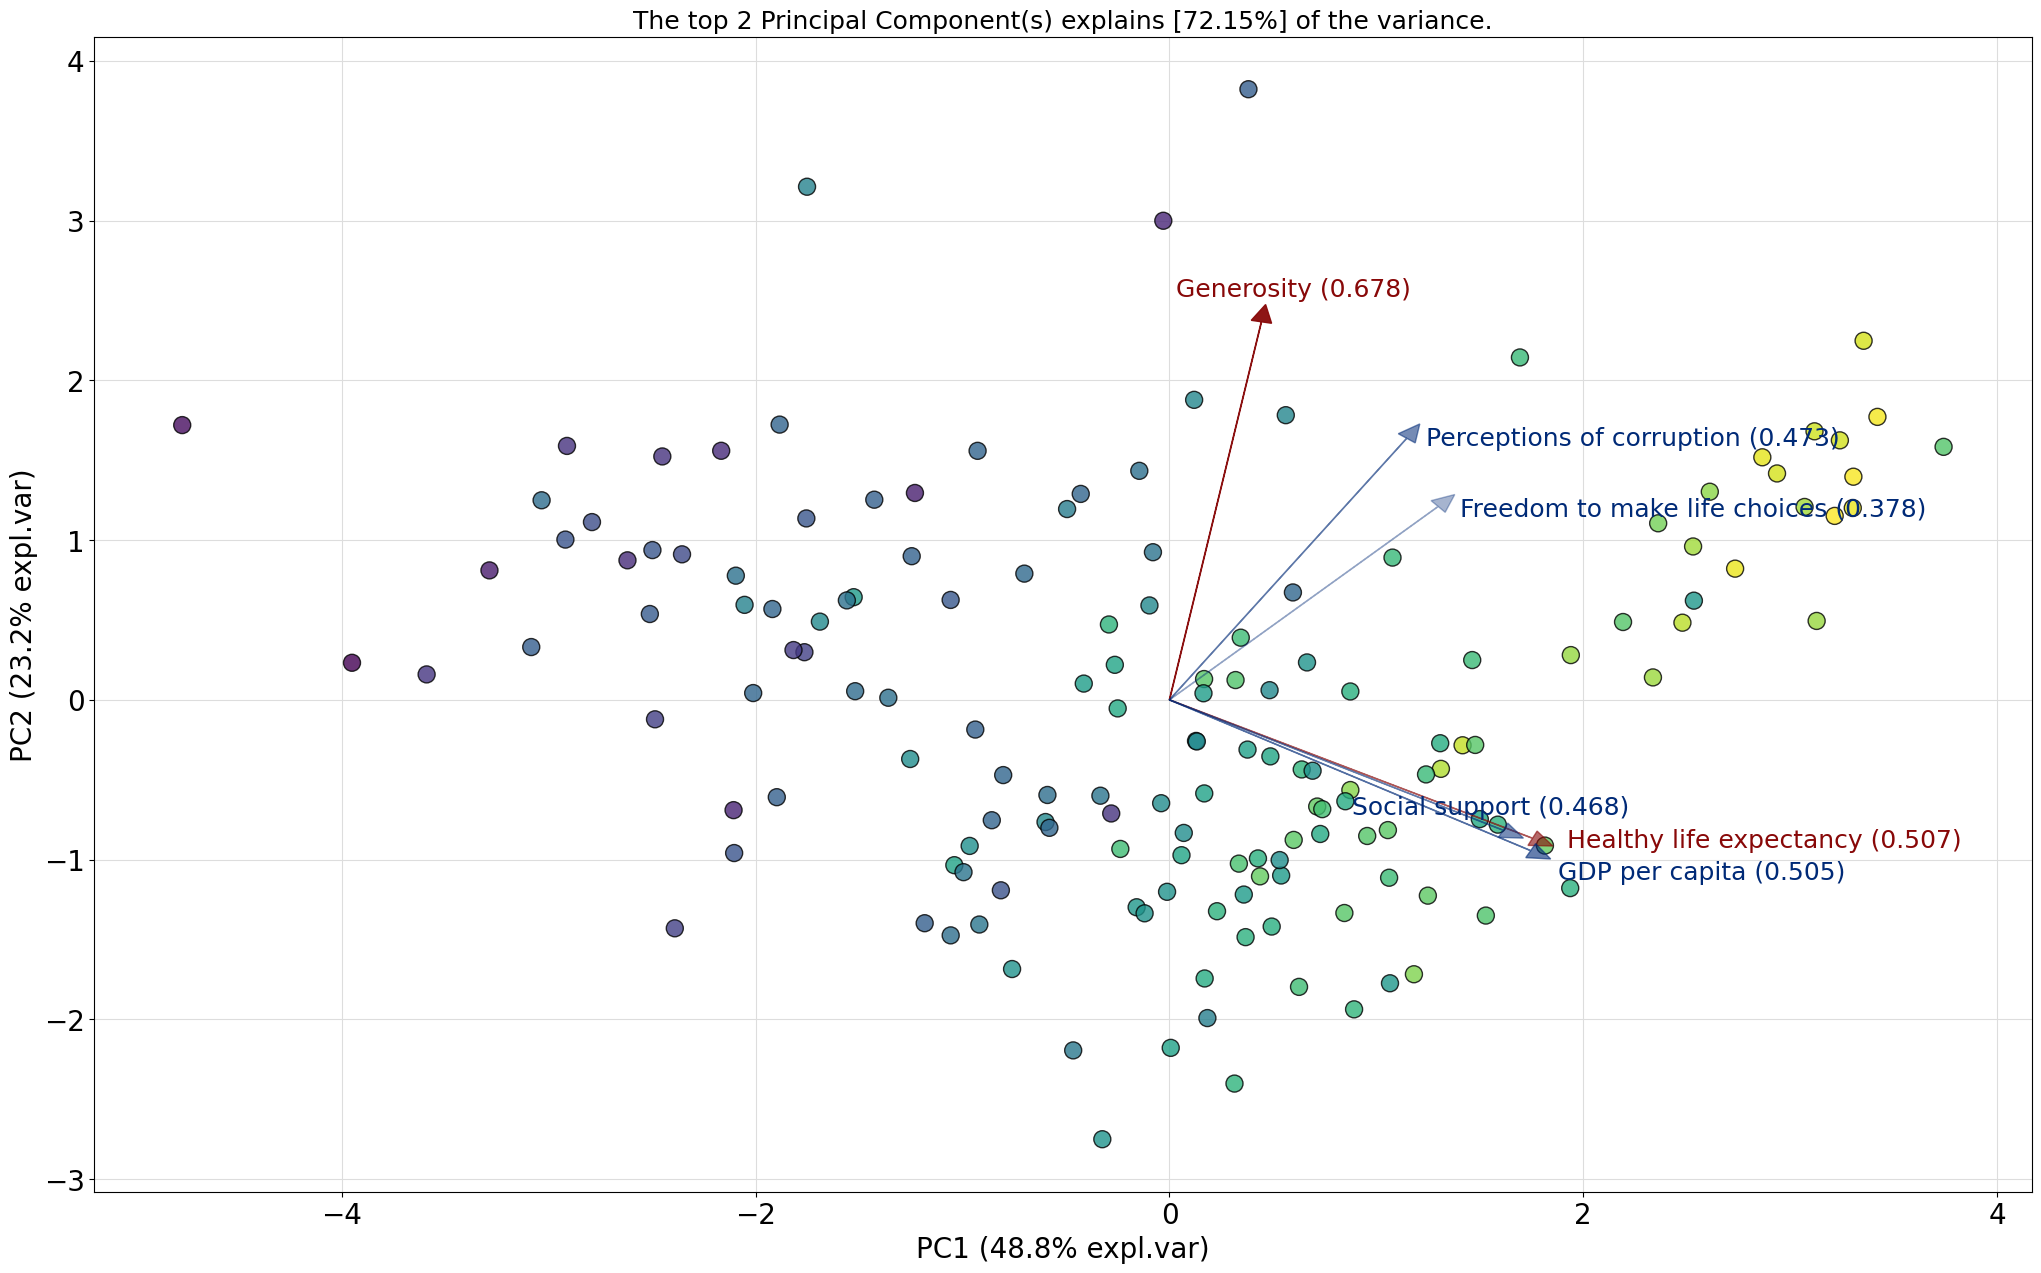

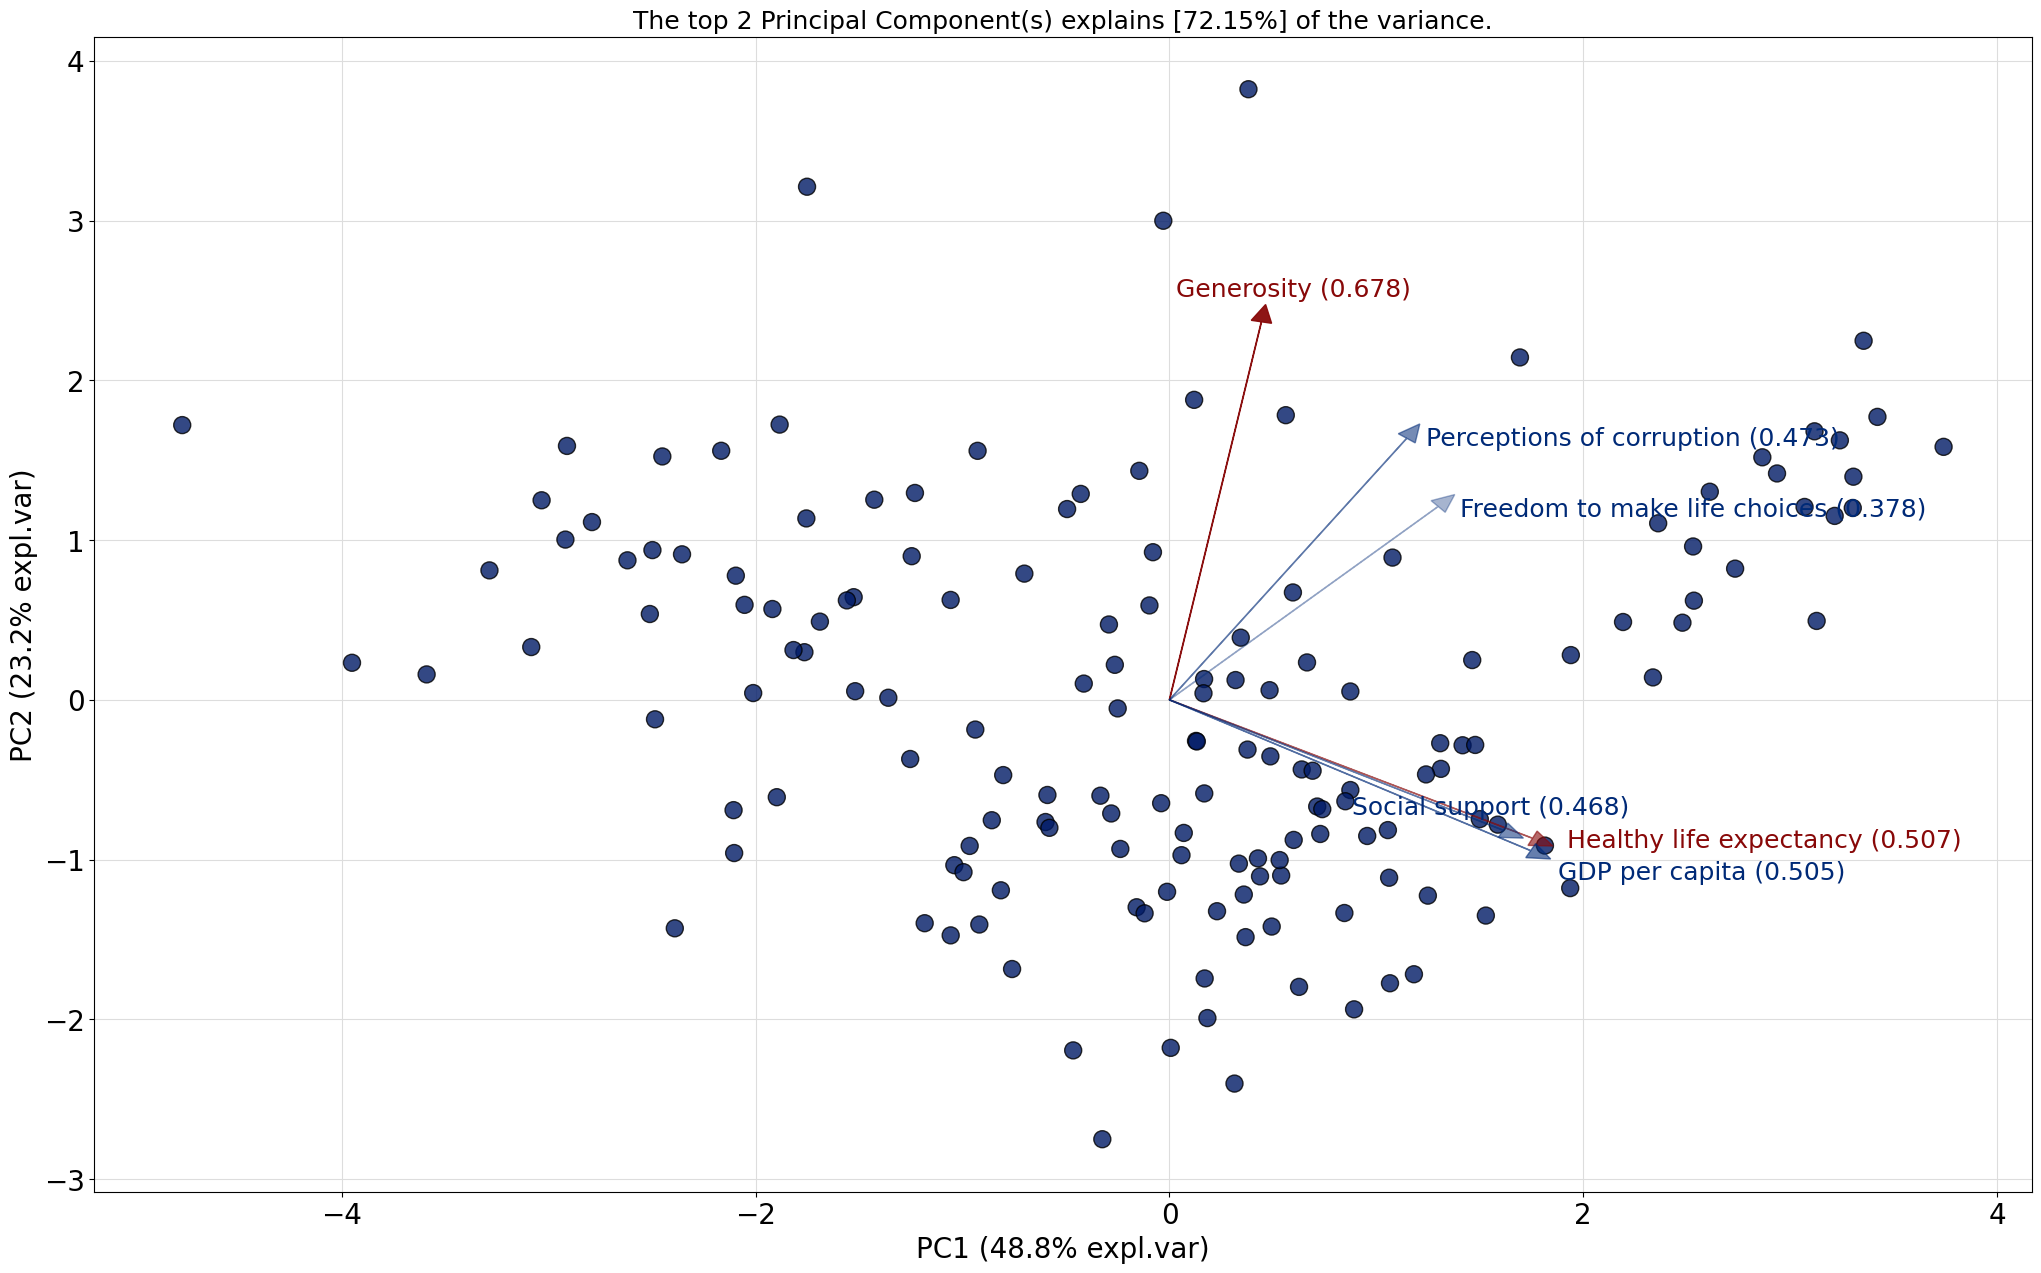

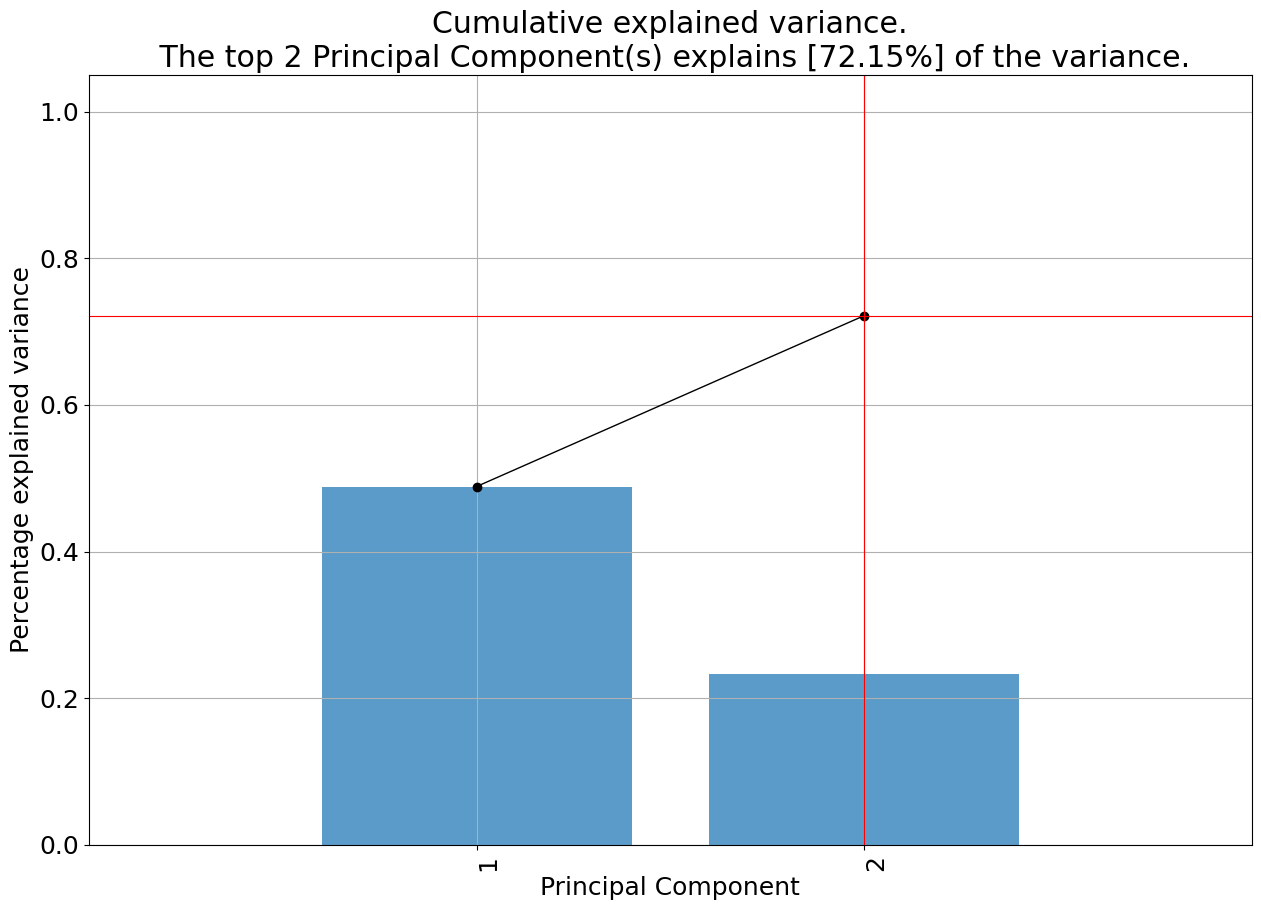

In [ ]:
# Try 1 with PCA from pca package
# Copy dataframe
pca_df = df.copy()

y = pca_df["Score"]

X = pca_df.drop(columns=["Score", "Country or region", "Overall rank"])

X = X.select_dtypes(include="number")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = pca(n_components=2)
results = model.fit_transform(
    X_scaled,
    col_labels=X.columns,
    row_labels=pca_df["Country or region"]
)

model.biplot(c=pca_df["Score"])
model.biplot(label=False)
model.plot()

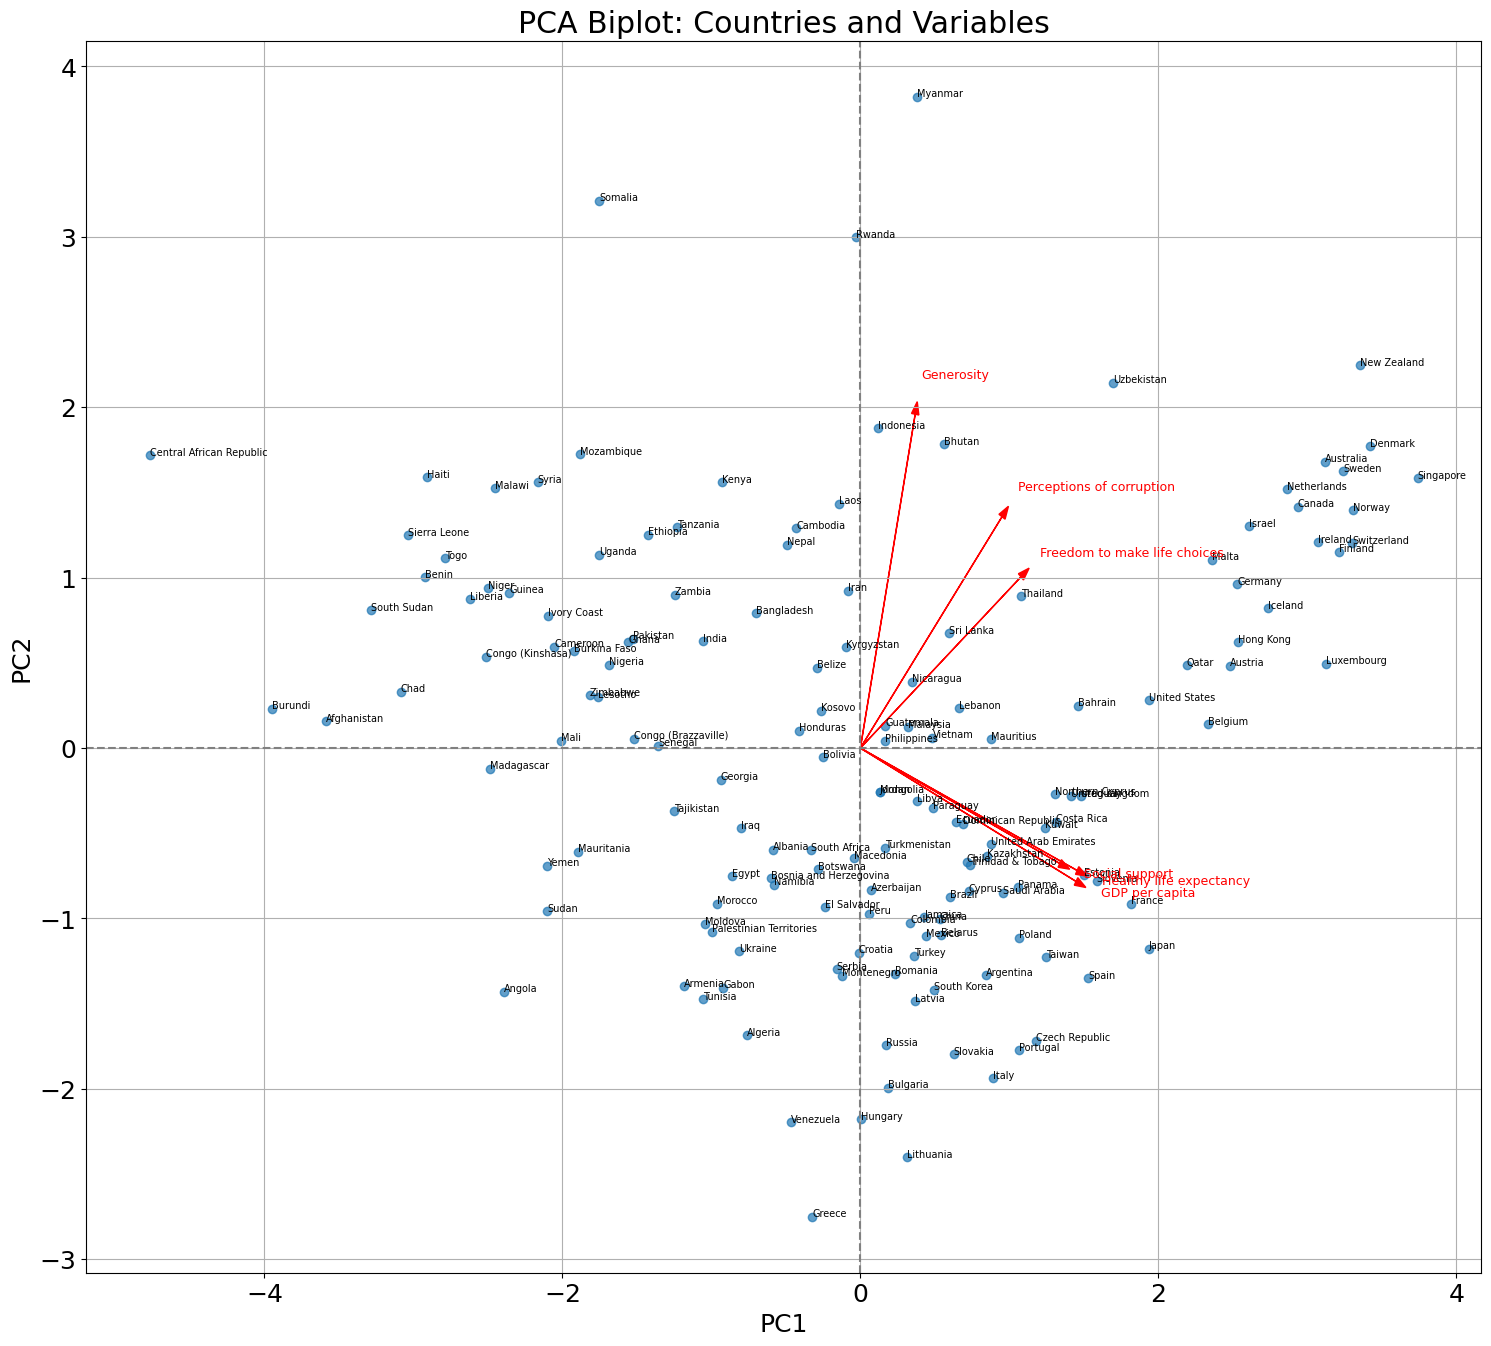

In [ ]:
# Try 2 with PCA from sklearn

# 1. Prepare data
pca_df = df.copy()

X = pca_df.drop(columns=["Score", "Country or region", "Overall rank"])
X = X.select_dtypes(include="number")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA(n_components=2)
scores = pca.fit_transform(X_scaled)

# Build PCA DataFrame
pca_df2 = pd.DataFrame(scores, columns=["PC1", "PC2"])
pca_df2["Country"] = df["Country or region"].values

# 3. Compute loadings
loadings = pca.components_.T  # shape = (n_features, 2)
feature_names = X.columns

# 4. Plot biplot
plt.figure(figsize=(18, 16))

# Plot countries
plt.scatter(pca_df2["PC1"], pca_df2["PC2"], alpha=0.7)

# Label countries
for i, country in enumerate(pca_df2["Country"]):
    plt.text(pca_df2["PC1"][i], pca_df2["PC2"][i], country, fontsize=7)

# Plot arrows (variables)
for i, feature in enumerate(feature_names):
    plt.arrow(
        0, 0,
        loadings[i, 0] * 3,
        loadings[i, 1] * 3,
        color="red",
        head_width=0.05,
        length_includes_head=True
    )
    plt.text(
        loadings[i, 0] * 3.2,
        loadings[i, 1] * 3.2,
        feature,
        color="red",
        fontsize=9
    )

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot: Countries and Variables")
plt.grid(True)
plt.show()


In [24]:
df[
    ["GDP per capita", "Social support", "Healthy life expectancy",
     "Freedom to make life choices", "Perceptions of corruption", "Generosity"]
].corr()


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
GDP per capita,1.000000,0.672080,0.844273,0.332275,0.323508,-0.011241
Social support,0.672080,1.000000,0.667288,0.411087,0.209731,0.018226
Healthy life expectancy,0.844273,0.667288,1.000000,0.355475,0.316322,0.020751
Freedom to make life choices,0.332275,0.411087,0.355475,1.000000,0.455087,0.297988
Perceptions of corruption,0.323508,0.209731,0.316322,0.455087,1.000000,0.361870
Generosity,-0.011241,0.018226,0.020751,0.297988,0.361870,1.000000
